# The purpose of this code is review types of dimension reductions in machine learning.

In [185]:
import os
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import decimal

In [186]:
df = pd.read_csv("all_data.csv")

In [187]:
print(f"Dataframe shape : {df.shape}")

Dataframe shape : (4424, 38)


In [188]:
df.head()

,Unnamed: 0,Marital status,Application mode,Application order,Course,"Daytime/evening attendance""""",Previous qualification,Previous qualification (grade),Nacionality,Mother\'s qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,17,5,171,1,1,122.0,1,19,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,1,15,1,9254,1,1,160.0,1,1,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,2,1,1,5,9070,1,1,122.0,1,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,3,1,17,2,9773,1,1,122.0,1,38,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,4,2,39,1,8014,0,1,100.0,1,37,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [189]:
list_of_activity = df["Target"].unique().tolist() 
print(list_of_activity)

['Dropout', 'Graduate', 'Enrolled']


In [190]:
X = df.drop(columns = "Target")
print(X.shape)

(4424, 37)


In [191]:
y = df["Target"]
print(y.shape)

(4424,)


In [192]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True)

In [193]:
X_train.shape

(3539, 37)

In [194]:
X_test.shape

(885, 37)

In [195]:
y_train.shape

(3539,)

In [196]:
y_test.shape

(885,)

In [197]:
GNB_classifer = GaussianNB()

In [198]:
fitted_GNB = GNB_classifer.fit(X_train, y_train)

In [199]:
y_predicted = fitted_GNB.predict(X_test)

In [200]:
y_predicted

array(['Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Enrolled', 'Graduate', 'Dropout',
       'Graduate', 'Dropout', 'Graduate', 'Dropout', 'Graduate',
       'Dropout', 'Graduate', 'Dropout', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Dropout', 'Dropout',
       'Graduate', 'Dropout', 'Dropout', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
       'Graduate', 'Dropout', 'Enrolled', 'Dropout', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Enrolled', 'Dropout', 'Dropout', 'Graduate', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate'

In [201]:
first_prediction = accuracy_score(y_test, y_predicted)
print(first_prediction)

0.6813559322033899


# Feature selection

**Select K best**

f_classif

In [202]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [203]:
feature_selection_SelectKBest_100 = SelectKBest(f_classif, k=10)

In [204]:
X_feature_selection_f_classif_100 = feature_selection_SelectKBest_100.fit_transform(X, y)
X_feature_selection_f_classif_100.shape

(4424, 10)

In [205]:
X_train_f_classif_100, X_test_f_classif_100,y_train_f_classif_100, y_test_f_classif_100 = train_test_split(X_feature_selection_f_classif_100,y, test_size=0.2)

In [206]:
print(f"X_train_f_classif_100: {X_train_f_classif_100.shape}")
print(f"X_test_f_classif_100: {X_test_f_classif_100.shape}")
print(f"y_train_f_classif_100: {y_train_f_classif_100.shape}")
print(f"y_test_f_classif_100: {y_test_f_classif_100.shape}")

X_train_f_classif_100: (3539, 10)
X_test_f_classif_100: (885, 10)
y_train_f_classif_100: (3539,)
y_test_f_classif_100: (885,)


In [207]:
fitted_GNB_f_classif_100 = GNB_classifer.fit(X_train_f_classif_100, y_train_f_classif_100)

In [208]:
y_predicted_f_classif_100 = fitted_GNB_f_classif_100.predict(X_test_f_classif_100)

In [209]:
    y_predicted_f_classif_100

array(['Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Dropout',
       'Enrolled', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Dropout', 'Graduate', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Enrolled', 'Graduate', 'Graduate', 'Dropout', 'Dropout',
       'Dropout', 'Dropout', 'Graduate', 'Graduate', 'Graduate',
       'Graduate', 'Graduate', 'Dropout', 'Enrolled', 'Dropout',
       'Dropout', 'Graduate', 'Dropout', 'Enrolled', 'Graduate',
       'Graduate', 'Graduate', 'Graduate', 'Enrolled', 'Graduate',
       'Enrolled', 'Enrolled', 'Graduate', 'Dropout', 'Dropout',
       'Graduate', 'Graduate', 'Graduate', 'Graduate', 'Enrolled',
       'Dropout', 'Dropout', 'Graduate', 'Dropout', 'Dropout', 'Graduate',
 

In [210]:
accuracy_prediction_f_classif_100 = accuracy_score(y_test_f_classif_100, y_predicted_f_classif_100)
print(f"accuracy_f_classif_100: {accuracy_prediction_f_classif_100}")

accuracy_f_classif_100: 0.6949152542372882


In [211]:
    feature_selection_SelectKBest_200 = SelectKBest(f_classif, k=20)
    X_feature_selection_f_classif_200 = feature_selection_SelectKBest_200.fit_transform(X, y)
    X_feature_selection_f_classif_200.shape
    X_train_f_classif_200, X_test_f_classif_200,y_train_f_classif_200, y_test_f_classif_200 = train_test_split(X_feature_selection_f_classif_200,y, test_size=0.2)
    print(f"X_train_f_classif_200: {X_train_f_classif_200.shape}")
    print(f"X_test_f_classif_200: {X_test_f_classif_200.shape}")
    print(f"y_train_f_classif_200: {y_train_f_classif_200.shape}")
    print(f"y_test_f_classif_200: {y_test_f_classif_200.shape}")
    fitted_GNB_f_classif_200 = GNB_classifer.fit(X_train_f_classif_200, y_train_f_classif_200)
    y_predicted_f_classif_200 = fitted_GNB_f_classif_200.predict(X_test_f_classif_200)
    accuracy_prediction_f_classif_200 = accuracy_score(y_test_f_classif_200, y_predicted_f_classif_200)
    print(f"accuracy_f_classif_200: {accuracy_prediction_f_classif_200}")

X_train_f_classif_200: (3539, 20)
X_test_f_classif_200: (885, 20)
y_train_f_classif_200: (3539,)
y_test_f_classif_200: (885,)
accuracy_f_classif_200: 0.696045197740113


In [212]:
feature_selection_SelectKBest_300 = SelectKBest(f_classif, k=30)
X_feature_selection_f_classif_300 = feature_selection_SelectKBest_300.fit_transform(X, y)
X_feature_selection_f_classif_300.shape
X_train_f_classif_300, X_test_f_classif_300,y_train_f_classif_300, y_test_f_classif_300 = train_test_split(X_feature_selection_f_classif_300,y, test_size=0.2)
print(f"X_train_f_classif_300: {X_train_f_classif_300.shape}")
print(f"X_test_f_classif_300: {X_test_f_classif_300.shape}")
print(f"y_train_f_classif_300: {y_train_f_classif_300.shape}")
print(f"y_test_f_classif_300: {y_test_f_classif_300.shape}")
fitted_GNB_f_classif_300 = GNB_classifer.fit(X_train_f_classif_300, y_train_f_classif_300)
y_predicted_f_classif_300 = fitted_GNB_f_classif_300.predict(X_test_f_classif_300)
accuracy_prediction_f_classif_300 = accuracy_score(y_test_f_classif_300, y_predicted_f_classif_300)
print(f"accuracy_f_classif_300: {accuracy_prediction_f_classif_300}")

X_train_f_classif_300: (3539, 30)
X_test_f_classif_300: (885, 30)
y_train_f_classif_300: (3539,)
y_test_f_classif_300: (885,)
accuracy_f_classif_300: 0.6994350282485876


In [213]:
feature_selection_SelectKBest_400 = SelectKBest(f_classif, k=36)
X_feature_selection_f_classif_400 = feature_selection_SelectKBest_400.fit_transform(X, y)
X_feature_selection_f_classif_400.shape
X_train_f_classif_400, X_test_f_classif_400,y_train_f_classif_400, y_test_f_classif_400 = train_test_split(X_feature_selection_f_classif_400,y, test_size=0.2)
print(f"X_train_f_classif_400: {X_train_f_classif_400.shape}")
print(f"X_test_f_classif_400: {X_test_f_classif_400.shape}")
print(f"y_train_f_classif_400: {y_train_f_classif_400.shape}")
print(f"y_test_f_classif_400: {y_test_f_classif_400.shape}")
fitted_GNB_f_classif_400 = GNB_classifer.fit(X_train_f_classif_400, y_train_f_classif_400)
y_predicted_f_classif_400 = fitted_GNB_f_classif_400.predict(X_test_f_classif_400)
accuracy_prediction_f_classif_400 = accuracy_score(y_test_f_classif_400, y_predicted_f_classif_400)
print(f"accuracy_f_classif_400: {accuracy_prediction_f_classif_400}")

X_train_f_classif_400: (3539, 36)
X_test_f_classif_400: (885, 36)
y_train_f_classif_400: (3539,)
y_test_f_classif_400: (885,)
accuracy_f_classif_400: 0.7028248587570621


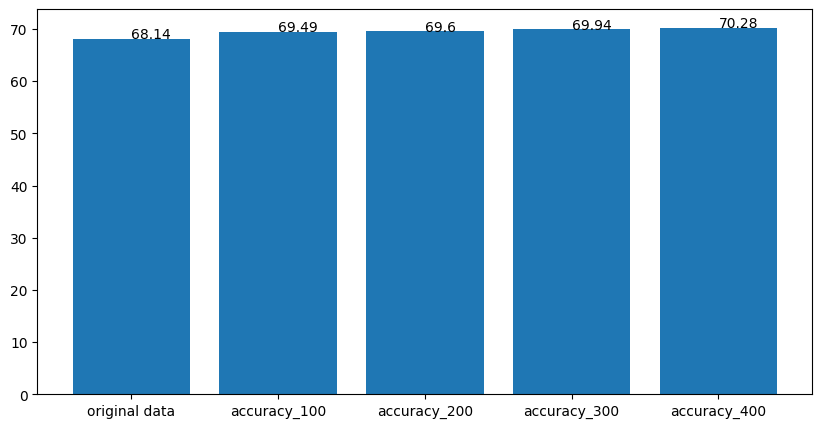

In [214]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

chi2

In [215]:
from sklearn.feature_selection import chi2

In [216]:
feature_selection_chi2_100 = SelectKBest(chi2, k=10)

In [217]:
X_feature_selection_chi2_100 = feature_selection_chi2_100.fit_transform(X, y)
X_feature_selection_chi2_100.shape

ValueError: Input X must be non-negative.

In [ ]:
min_of_columns = X.min()
min_of_dataframe = min_of_columns.min()
min_of_dataframe

In [ ]:
max_of_columns = X.max()
max_of_dataframe = max_of_columns.max()
max_of_dataframe

> solution: MinMaxScaler

In [218]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaler.fit(X)
scaled = scaler.fit_transform(X)
X_max_min = pd.DataFrame(scaled, columns=X.columns)
X_max_min

,Unnamed: 0,Marital status,Application mode,Application order,Course,"Daytime/evening attendance""""",Previous qualification,Previous qualification (grade),Nacionality,Mother\'s qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,0.000000,0.0,0.285714,0.555556,0.013858,1.0,0.0,0.284211,0.000000,0.418605,...,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
1,0.000226,0.0,0.250000,0.111111,0.925989,1.0,0.0,0.684211,0.000000,0.000000,...,0.0,0.0,0.260870,0.181818,0.30,0.735897,0.0,0.732558,0.111111,0.640687
2,0.000452,0.0,0.000000,0.555556,0.907512,1.0,0.0,0.284211,0.000000,0.837209,...,0.0,0.0,0.260870,0.000000,0.00,0.000000,0.0,0.372093,0.488889,0.766182
3,0.000678,0.0,0.285714,0.222222,0.978108,1.0,0.0,0.284211,0.000000,0.860465,...,0.0,0.0,0.260870,0.303030,0.25,0.667692,0.0,0.209302,0.000000,0.124174
4,0.000904,0.2,0.678571,0.111111,0.801466,0.0,0.0,0.052632,0.000000,0.837209,...,0.0,0.0,0.260870,0.181818,0.30,0.700000,0.0,0.732558,0.111111,0.640687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.999096,0.0,0.000000,0.666667,0.978108,1.0,0.0,0.315789,0.000000,0.000000,...,0.0,0.0,0.260870,0.242424,0.25,0.682051,0.0,0.918605,0.800000,0.000000
4420,0.999322,0.0,0.000000,0.222222,0.978108,1.0,0.0,0.263158,0.962963,0.000000,...,0.0,0.0,0.260870,0.181818,0.10,0.592308,0.0,0.406977,0.311111,0.803170
4421,0.999548,0.0,0.000000,0.111111,0.950693,1.0,0.0,0.621053,0.000000,0.837209,...,0.0,0.0,0.347826,0.272727,0.05,0.726923,0.0,0.732558,0.111111,0.640687
4422,0.999774,0.0,0.000000,0.111111,0.915244,1.0,0.0,0.894737,0.000000,0.837209,...,0.0,0.0,0.217391,0.181818,0.25,0.646154,0.0,0.209302,0.000000,0.124174


In [219]:
feature_selection_SelectKBest_100 = SelectKBest(chi2, k=10)
X_feature_selection_chi2_100 = feature_selection_SelectKBest_100.fit_transform(X_max_min, y)
X_feature_selection_chi2_100.shape
X_train_chi2_100, X_test_chi2_100,y_train_chi2_100, y_test_chi2_100 = train_test_split(X_feature_selection_chi2_100,y, test_size=0.2)
print(f"X_train_chi2_100: {X_train_chi2_100.shape}")
print(f"X_test_chi2_100: {X_test_chi2_100.shape}")
print(f"y_train_chi2_100: {y_train_chi2_100.shape}")
print(f"y_test_chi2_100: {y_test_chi2_100.shape}")
fitted_GNB_chi2_100 = GNB_classifer.fit(X_train_chi2_100, y_train_chi2_100)
y_predicted_chi2_100 = fitted_GNB_chi2_100.predict(X_test_chi2_100)
accuracy_prediction_chi2_100 = accuracy_score(y_test_chi2_100, y_predicted_chi2_100)
print(f"accuracy_chi2_100: {accuracy_prediction_chi2_100}")

X_train_chi2_100: (3539, 10)
X_test_chi2_100: (885, 10)
y_train_chi2_100: (3539,)
y_test_chi2_100: (885,)
accuracy_chi2_100: 0.6813559322033899


In [220]:
feature_selection_SelectKBest_200 = SelectKBest(chi2, k=20)
X_feature_selection_chi2_200 = feature_selection_SelectKBest_200.fit_transform(X_max_min, y)
X_feature_selection_chi2_200.shape
X_train_chi2_200, X_test_chi2_200,y_train_chi2_200, y_test_chi2_200 = train_test_split(X_feature_selection_chi2_200,y, test_size=0.2)
print(f"X_train_chi2_200: {X_train_chi2_200.shape}")
print(f"X_test_chi2_200: {X_test_chi2_200.shape}")
print(f"y_train_chi2_200: {y_train_chi2_200.shape}")
print(f"y_test_chi2_200: {y_test_chi2_200.shape}")
fitted_GNB_chi2_200 = GNB_classifer.fit(X_train_chi2_200, y_train_chi2_200)
y_predicted_chi2_200 = fitted_GNB_chi2_200.predict(X_test_chi2_200)
accuracy_prediction_chi2_200 = accuracy_score(y_test_chi2_200, y_predicted_chi2_200)
print(f"accuracy_chi2_200: {accuracy_prediction_chi2_200}")

X_train_chi2_200: (3539, 20)
X_test_chi2_200: (885, 20)
y_train_chi2_200: (3539,)
y_test_chi2_200: (885,)
accuracy_chi2_200: 0.6892655367231638


In [221]:
feature_selection_SelectKBest_300 = SelectKBest(chi2, k=30)
X_feature_selection_chi2_300 = feature_selection_SelectKBest_300.fit_transform(X_max_min, y)
X_feature_selection_chi2_300.shape
X_train_chi2_300, X_test_chi2_300,y_train_chi2_300, y_test_chi2_300 = train_test_split(X_feature_selection_chi2_300,y, test_size=0.2)
print(f"X_train_chi2_300: {X_train_chi2_300.shape}")
print(f"X_test_chi2_300: {X_test_chi2_300.shape}")
print(f"y_train_chi2_300: {y_train_chi2_300.shape}")
print(f"y_test_chi2_300: {y_test_chi2_300.shape}")
fitted_GNB_chi2_300 = GNB_classifer.fit(X_train_chi2_300, y_train_chi2_300)
y_predicted_chi2_300 = fitted_GNB_chi2_300.predict(X_test_chi2_300)
accuracy_prediction_chi2_300 = accuracy_score(y_test_chi2_300, y_predicted_chi2_300)
print(f"accuracy_chi2_300: {accuracy_prediction_chi2_300}")

X_train_chi2_300: (3539, 30)
X_test_chi2_300: (885, 30)
y_train_chi2_300: (3539,)
y_test_chi2_300: (885,)
accuracy_chi2_300: 0.7096045197740113


In [222]:
feature_selection_SelectKBest_400 = SelectKBest(chi2, k=36)
X_feature_selection_chi2_400 = feature_selection_SelectKBest_400.fit_transform(X_max_min, y)
X_feature_selection_chi2_400.shape
X_train_chi2_400, X_test_chi2_400,y_train_chi2_400, y_test_chi2_400 = train_test_split(X_feature_selection_chi2_400,y, test_size=0.2)
print(f"X_train_chi2_400: {X_train_chi2_400.shape}")
print(f"X_test_chi2_400: {X_test_chi2_400.shape}")
print(f"y_train_chi2_400: {y_train_chi2_400.shape}")
print(f"y_test_chi2_400: {y_test_chi2_400.shape}")
fitted_GNB_chi2_400 = GNB_classifer.fit(X_train_chi2_400, y_train_chi2_400)
y_predicted_chi2_400 = fitted_GNB_chi2_400.predict(X_test_chi2_400)
accuracy_prediction_chi2_400 = accuracy_score(y_test_chi2_400, y_predicted_chi2_400)
print(f"accuracy_chi2_400: {accuracy_prediction_chi2_400}")

X_train_chi2_400: (3539, 36)
X_test_chi2_400: (885, 36)
y_train_chi2_400: (3539,)
y_test_chi2_400: (885,)
accuracy_chi2_400: 0.6870056497175141


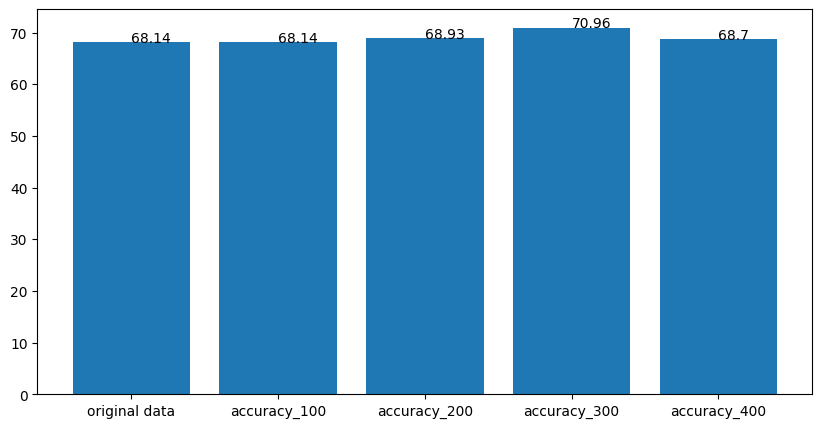

In [223]:
import matplotlib.pyplot as plt

execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

mutual_info_classif

In [224]:
from sklearn.feature_selection import mutual_info_classif

feature_selection_SelectKBest_100 = SelectKBest(mutual_info_classif, k=10)
X_feature_selection_mutual_info_classif_100 = feature_selection_SelectKBest_100.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_100.shape
X_train_mutual_info_classif_100, X_test_mutual_info_classif_100,y_train_mutual_info_classif_100, y_test_mutual_info_classif_100 = train_test_split(X_feature_selection_mutual_info_classif_100,y, test_size=0.2)
print(f"X_train_mutual_info_classif_100: {X_train_mutual_info_classif_100.shape}")
print(f"X_test_mutual_info_classif_100: {X_test_mutual_info_classif_100.shape}")
print(f"y_train_mutual_info_classif_100: {y_train_mutual_info_classif_100.shape}")
print(f"y_test_mutual_info_classif_100: {y_test_mutual_info_classif_100.shape}")
fitted_GNB_mutual_info_classif_100 = GNB_classifer.fit(X_train_mutual_info_classif_100, y_train_mutual_info_classif_100)
y_predicted_mutual_info_classif_100 = fitted_GNB_mutual_info_classif_100.predict(X_test_mutual_info_classif_100)
accuracy_prediction_mutual_info_classif_100 = accuracy_score(y_test_mutual_info_classif_100, y_predicted_mutual_info_classif_100)
print(f"accuracy_mutual_info_classif_100: {accuracy_prediction_mutual_info_classif_100}")

X_train_mutual_info_classif_100: (3539, 10)
X_test_mutual_info_classif_100: (885, 10)
y_train_mutual_info_classif_100: (3539,)
y_test_mutual_info_classif_100: (885,)
accuracy_mutual_info_classif_100: 0.7163841807909604


In [225]:
feature_selection_SelectKBest_200 = SelectKBest(mutual_info_classif, k=20)
X_feature_selection_mutual_info_classif_200 = feature_selection_SelectKBest_200.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_200.shape
X_train_mutual_info_classif_200, X_test_mutual_info_classif_200,y_train_mutual_info_classif_200, y_test_mutual_info_classif_200 = train_test_split(X_feature_selection_mutual_info_classif_200,y, test_size=0.2)
print(f"X_train_mutual_info_classif_200: {X_train_mutual_info_classif_200.shape}")
print(f"X_test_mutual_info_classif_200: {X_test_mutual_info_classif_200.shape}")
print(f"y_train_mutual_info_classif_200: {y_train_mutual_info_classif_200.shape}")
print(f"y_test_mutual_info_classif_200: {y_test_mutual_info_classif_200.shape}")
fitted_GNB_mutual_info_classif_200 = GNB_classifer.fit(X_train_mutual_info_classif_200, y_train_mutual_info_classif_200)
y_predicted_mutual_info_classif_200 = fitted_GNB_mutual_info_classif_200.predict(X_test_mutual_info_classif_200)
accuracy_prediction_mutual_info_classif_200 = accuracy_score(y_test_mutual_info_classif_200, y_predicted_mutual_info_classif_200)
print(f"accuracy_mutual_info_classif_200: {accuracy_prediction_mutual_info_classif_200}")

X_train_mutual_info_classif_200: (3539, 20)
X_test_mutual_info_classif_200: (885, 20)
y_train_mutual_info_classif_200: (3539,)
y_test_mutual_info_classif_200: (885,)
accuracy_mutual_info_classif_200: 0.711864406779661


In [226]:
feature_selection_SelectKBest_300 = SelectKBest(mutual_info_classif, k=30)
X_feature_selection_mutual_info_classif_300 = feature_selection_SelectKBest_300.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_300.shape
X_train_mutual_info_classif_300, X_test_mutual_info_classif_300,y_train_mutual_info_classif_300, y_test_mutual_info_classif_300 = train_test_split(X_feature_selection_mutual_info_classif_300,y, test_size=0.2)
print(f"X_train_mutual_info_classif_300: {X_train_mutual_info_classif_300.shape}")
print(f"X_test_mutual_info_classif_300: {X_test_mutual_info_classif_300.shape}")
print(f"y_train_mutual_info_classif_300: {y_train_mutual_info_classif_300.shape}")
print(f"y_test_mutual_info_classif_300: {y_test_mutual_info_classif_300.shape}")
fitted_GNB_mutual_info_classif_300 = GNB_classifer.fit(X_train_mutual_info_classif_300, y_train_mutual_info_classif_300)
y_predicted_mutual_info_classif_300 = fitted_GNB_mutual_info_classif_300.predict(X_test_mutual_info_classif_300)
accuracy_prediction_mutual_info_classif_300 = accuracy_score(y_test_mutual_info_classif_300, y_predicted_mutual_info_classif_300)
print(f"accuracy_mutual_info_classif_300: {accuracy_prediction_mutual_info_classif_300}")

X_train_mutual_info_classif_300: (3539, 30)
X_test_mutual_info_classif_300: (885, 30)
y_train_mutual_info_classif_300: (3539,)
y_test_mutual_info_classif_300: (885,)
accuracy_mutual_info_classif_300: 0.7016949152542373


In [227]:
feature_selection_SelectKBest_400 = SelectKBest(mutual_info_classif, k=36)
X_feature_selection_mutual_info_classif_400 = feature_selection_SelectKBest_400.fit_transform(X_max_min, y)
X_feature_selection_mutual_info_classif_400.shape
X_train_mutual_info_classif_400, X_test_mutual_info_classif_400,y_train_mutual_info_classif_400, y_test_mutual_info_classif_400 = train_test_split(X_feature_selection_mutual_info_classif_400,y, test_size=0.2)
print(f"X_train_mutual_info_classif_400: {X_train_mutual_info_classif_400.shape}")
print(f"X_test_mutual_info_classif_400: {X_test_mutual_info_classif_400.shape}")
print(f"y_train_mutual_info_classif_400: {y_train_mutual_info_classif_400.shape}")
print(f"y_test_mutual_info_classif_400: {y_test_mutual_info_classif_400.shape}")
fitted_GNB_mutual_info_classif_400 = GNB_classifer.fit(X_train_mutual_info_classif_400, y_train_mutual_info_classif_400)
y_predicted_mutual_info_classif_400 = fitted_GNB_mutual_info_classif_400.predict(X_test_mutual_info_classif_400)
accuracy_prediction_mutual_info_classif_400 = accuracy_score(y_test_mutual_info_classif_400, y_predicted_mutual_info_classif_400)
print(f"accuracy_mutual_info_classif_400: {accuracy_prediction_mutual_info_classif_400}")

X_train_mutual_info_classif_400: (3539, 36)
X_test_mutual_info_classif_400: (885, 36)
y_train_mutual_info_classif_400: (3539,)
y_test_mutual_info_classif_400: (885,)
accuracy_mutual_info_classif_400: 0.6542372881355932


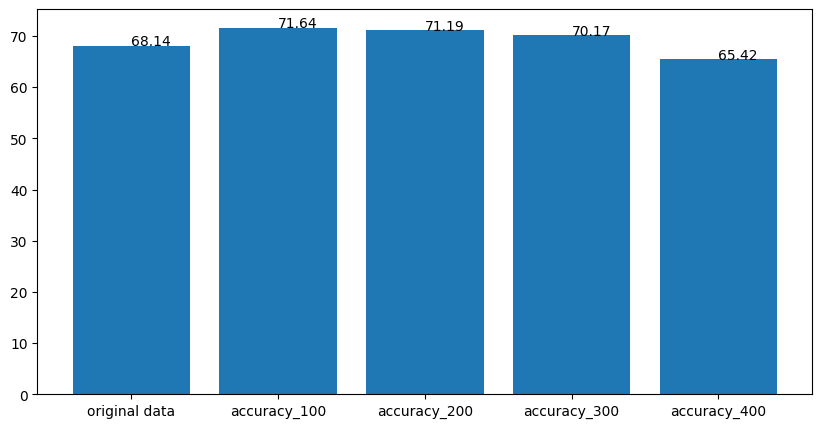

In [228]:
execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_mutual_info_classif_100*100,2)), float(round(accuracy_prediction_mutual_info_classif_200*100,2)), 
            float(round(accuracy_prediction_mutual_info_classif_300*100,2)), float(round(accuracy_prediction_mutual_info_classif_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

Summary of Kbest

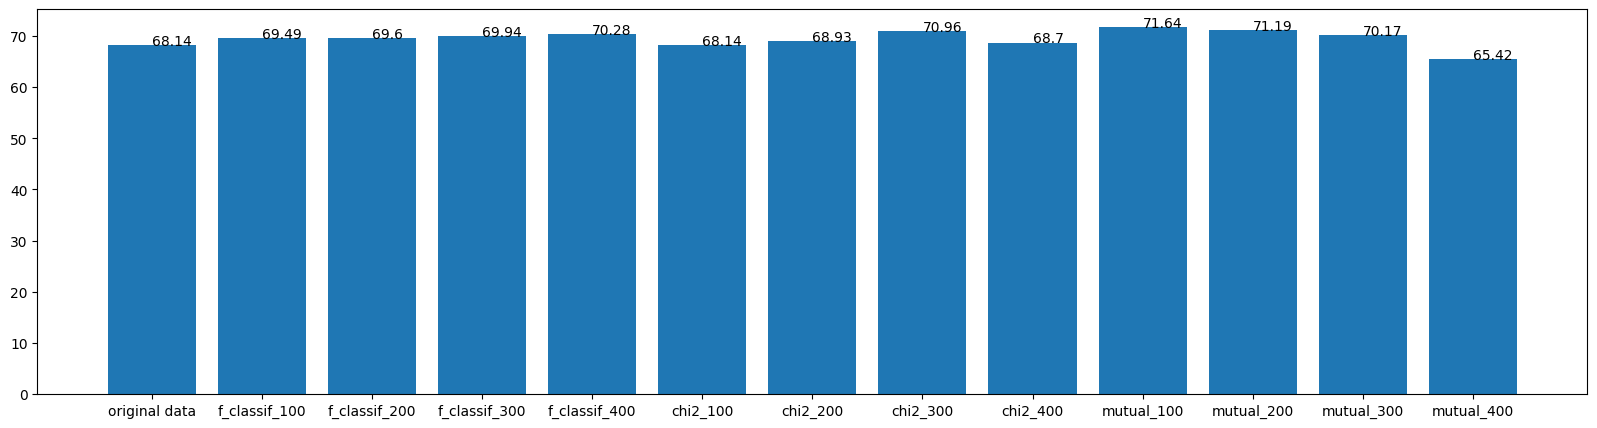

In [229]:
execution = ("original data", 'f_classif_100','f_classif_200',
             'f_classif_300','f_classif_400','chi2_100','chi2_200',
             'chi2_300','chi2_400','mutual_100','mutual_200',
             'mutual_300','mutual_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_100*100,2)), float(round(accuracy_prediction_f_classif_200*100,2)), 
            float(round(accuracy_prediction_f_classif_300*100,2)), float(round(accuracy_prediction_f_classif_400*100,2)), float(round(accuracy_prediction_chi2_100*100,2)), float(round(accuracy_prediction_chi2_200*100,2)), 
            float(round(accuracy_prediction_chi2_300*100,2)), float(round(accuracy_prediction_chi2_400*100,2)), float(round(accuracy_prediction_mutual_info_classif_100*100,2)), float(round(accuracy_prediction_mutual_info_classif_200*100,2)), 
            float(round(accuracy_prediction_mutual_info_classif_300*100,2)), float(round(accuracy_prediction_mutual_info_classif_400*100,2))]
fig = plt.figure(figsize = (20, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

In [230]:
from sklearn.feature_selection import SelectPercentile

In [231]:
feature_selection_SelectPercentile_25 = SelectPercentile(f_classif, percentile=25)
X_feature_selection_f_classif_25 = feature_selection_SelectPercentile_25.fit_transform(X, y)
X_feature_selection_f_classif_25.shape
X_train_f_classif_25, X_test_f_classif_25,y_train_f_classif_25, y_test_f_classif_25 = train_test_split(X_feature_selection_f_classif_25,y, test_size=0.2)
print(f"X_train_f_classif_25: {X_train_f_classif_25.shape}")
print(f"X_test_f_classif_25: {X_test_f_classif_25.shape}")
print(f"y_train_f_classif_25: {y_train_f_classif_25.shape}")
print(f"y_test_f_classif_25: {y_test_f_classif_25.shape}")
fitted_GNB_f_classif_25 = GNB_classifer.fit(X_train_f_classif_25, y_train_f_classif_25)
y_predicted_f_classif_25 = fitted_GNB_f_classif_25.predict(X_test_f_classif_25)
accuracy_prediction_f_classif_25 = accuracy_score(y_test_f_classif_25, y_predicted_f_classif_25)
print(f"accuracy_f_classif_25: {accuracy_prediction_f_classif_25}")

X_train_f_classif_25: (3539, 9)
X_test_f_classif_25: (885, 9)
y_train_f_classif_25: (3539,)
y_test_f_classif_25: (885,)
accuracy_f_classif_25: 0.7197740112994351


In [232]:
feature_selection_SelectPercentile_50 = SelectPercentile(f_classif, percentile=50)
X_feature_selection_f_classif_50 = feature_selection_SelectPercentile_50.fit_transform(X, y)
X_feature_selection_f_classif_50.shape
X_train_f_classif_50, X_test_f_classif_50,y_train_f_classif_50, y_test_f_classif_50 = train_test_split(X_feature_selection_f_classif_50,y, test_size=0.2)
print(f"X_train_f_classif_50: {X_train_f_classif_50.shape}")
print(f"X_test_f_classif_50: {X_test_f_classif_50.shape}")
print(f"y_train_f_classif_50: {y_train_f_classif_50.shape}")
print(f"y_test_f_classif_50: {y_test_f_classif_50.shape}")
fitted_GNB_f_classif_50 = GNB_classifer.fit(X_train_f_classif_50, y_train_f_classif_50)
y_predicted_f_classif_50 = fitted_GNB_f_classif_50.predict(X_test_f_classif_50)
accuracy_prediction_f_classif_50 = accuracy_score(y_test_f_classif_50, y_predicted_f_classif_50)
print(f"accuracy_f_classif_50: {accuracy_prediction_f_classif_50}")

X_train_f_classif_50: (3539, 18)
X_test_f_classif_50: (885, 18)
y_train_f_classif_50: (3539,)
y_test_f_classif_50: (885,)
accuracy_f_classif_50: 0.696045197740113


In [233]:
feature_selection_SelectPercentile_75 = SelectPercentile(f_classif, percentile=75)
X_feature_selection_f_classif_75 = feature_selection_SelectPercentile_75.fit_transform(X, y)
X_feature_selection_f_classif_75.shape
X_train_f_classif_75, X_test_f_classif_75,y_train_f_classif_75, y_test_f_classif_75 = train_test_split(X_feature_selection_f_classif_75,y, test_size=0.2)
print(f"X_train_f_classif_75: {X_train_f_classif_75.shape}")
print(f"X_test_f_classif_75: {X_test_f_classif_75.shape}")
print(f"y_train_f_classif_75: {y_train_f_classif_75.shape}")
print(f"y_test_f_classif_75: {y_test_f_classif_75.shape}")
fitted_GNB_f_classif_75 = GNB_classifer.fit(X_train_f_classif_75, y_train_f_classif_75)
y_predicted_f_classif_75 = fitted_GNB_f_classif_75.predict(X_test_f_classif_75)
accuracy_prediction_f_classif_75 = accuracy_score(y_test_f_classif_75, y_predicted_f_classif_75)
print(f"accuracy_f_classif_75: {accuracy_prediction_f_classif_75}")

X_train_f_classif_75: (3539, 27)
X_test_f_classif_75: (885, 27)
y_train_f_classif_75: (3539,)
y_test_f_classif_75: (885,)
accuracy_f_classif_75: 0.6847457627118644


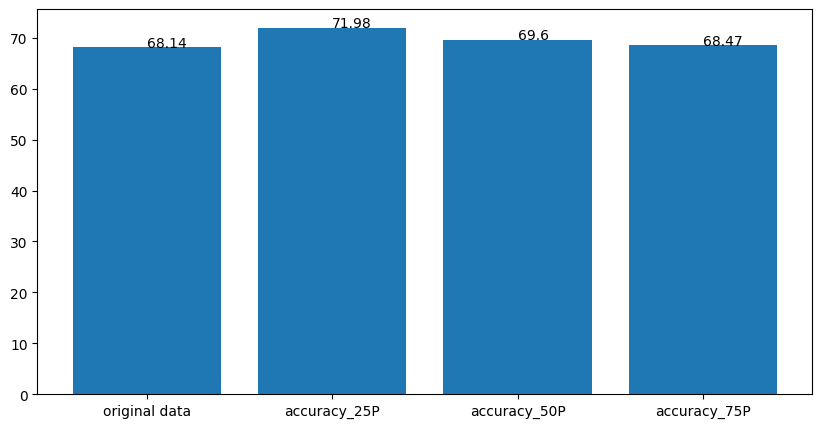

In [234]:
execution = ("original data", 'accuracy_25P','accuracy_50P',
             'accuracy_75P')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_f_classif_25*100,2)), float(round(accuracy_prediction_f_classif_50*100,2)), 
            float(round(accuracy_prediction_f_classif_75*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

# PCA

In [235]:
from sklearn import decomposition

In [236]:
pca_100 = decomposition.PCA(n_components=10)
pca_100.fit(X)
X_pca_100 = pca_100.transform(X)

In [237]:
X_pca_100.shape

(4424, 10)

In [238]:
X_train_pca_100, X_test_pca_100,y_train_pca_100, y_test_pca_100 = train_test_split(X_pca_100,y, test_size=0.2)

In [239]:
print(f"X_train_pca_100: {X_train_pca_100.shape}")
print(f"X_test_pca_100: {X_test_pca_100.shape}")
print(f"y_train_pca_100: {y_train_pca_100.shape}")
print(f"y_test_pca_100: {y_test_pca_100.shape}")

X_train_pca_100: (3539, 10)
X_test_pca_100: (885, 10)
y_train_pca_100: (3539,)
y_test_pca_100: (885,)


In [240]:
fitted_GNB_pca_100 = GNB_classifer.fit(X_train_pca_100, y_train_pca_100)

In [241]:
y_predicted_pca_100 = fitted_GNB_pca_100.predict(X_test_pca_100)

In [242]:
accuracy_prediction_pca_100 = accuracy_score(y_test_pca_100, y_predicted_pca_100)
print(f"accuracy_pca_100: {accuracy_prediction_pca_100}")

accuracy_pca_100: 0.6384180790960452


In [243]:
pca_200 = decomposition.PCA(n_components=20)
pca_200.fit(X)
X_pca_200 = pca_200.transform(X)
X_train_pca_200, X_test_pca_200,y_train_pca_200, y_test_pca_200 = train_test_split(X_pca_200,y, test_size=0.2)
print(f"X_train_pca_200: {X_train_pca_200.shape}")
print(f"X_test_pca_200: {X_test_pca_200.shape}")
print(f"y_train_pca_200: {y_train_pca_200.shape}")
print(f"y_test_pca_200: {y_test_pca_200.shape}")
fitted_GNB_pca_200 = GNB_classifer.fit(X_train_pca_200, y_train_pca_200)
y_predicted_pca_200 = fitted_GNB_pca_200.predict(X_test_pca_200)	
accuracy_prediction_pca_200 = accuracy_score(y_test_pca_200, y_predicted_pca_200)
print(f"accuracy_pca_200: {accuracy_prediction_pca_200}")

X_train_pca_200: (3539, 20)
X_test_pca_200: (885, 20)
y_train_pca_200: (3539,)
y_test_pca_200: (885,)
accuracy_pca_200: 0.6418079096045197


In [244]:
pca_300 = decomposition.PCA(n_components=30)
pca_300.fit(X)
X_pca_300 = pca_300.transform(X)
X_train_pca_300, X_test_pca_300,y_train_pca_300, y_test_pca_300 = train_test_split(X_pca_300,y, test_size=0.2)
print(f"X_train_pca_300: {X_train_pca_300.shape}")
print(f"X_test_pca_300: {X_test_pca_300.shape}")
print(f"y_train_pca_300: {y_train_pca_300.shape}")
print(f"y_test_pca_300: {y_test_pca_300.shape}")
fitted_GNB_pca_300 = GNB_classifer.fit(X_train_pca_300, y_train_pca_300)
y_predicted_pca_300 = fitted_GNB_pca_300.predict(X_test_pca_300)	
accuracy_prediction_pca_300 = accuracy_score(y_test_pca_300, y_predicted_pca_300)
print(f"accuracy_pca_300: {accuracy_prediction_pca_300}")

X_train_pca_300: (3539, 30)
X_test_pca_300: (885, 30)
y_train_pca_300: (3539,)
y_test_pca_300: (885,)
accuracy_pca_300: 0.6598870056497175


In [245]:
pca_400 = decomposition.PCA(n_components=37)
pca_400.fit(X)
X_pca_400 = pca_400.transform(X)
X_train_pca_400, X_test_pca_400,y_train_pca_400, y_test_pca_400 = train_test_split(X_pca_400,y, test_size=0.2)
print(f"X_train_pca_400: {X_train_pca_400.shape}")
print(f"X_test_pca_400: {X_test_pca_400.shape}")
print(f"y_train_pca_400: {y_train_pca_400.shape}")
print(f"y_test_pca_400: {y_test_pca_400.shape}")
fitted_GNB_pca_400 = GNB_classifer.fit(X_train_pca_400, y_train_pca_400)
y_predicted_pca_400 = fitted_GNB_pca_400.predict(X_test_pca_400)	
accuracy_prediction_pca_400 = accuracy_score(y_test_pca_400, y_predicted_pca_400)
print(f"accuracy_pca_400: {accuracy_prediction_pca_400}")

X_train_pca_400: (3539, 37)
X_test_pca_400: (885, 37)
y_train_pca_400: (3539,)
y_test_pca_400: (885,)
accuracy_pca_400: 0.6824858757062147


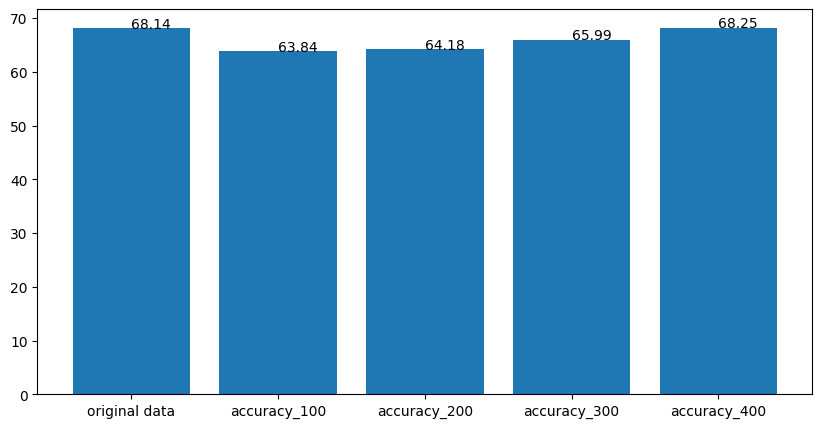

In [246]:
execution = ("original data", 'accuracy_100','accuracy_200',
             'accuracy_300','accuracy_400')
accuracy = [float(round(first_prediction*100,2)), float(round(accuracy_prediction_pca_100*100,2)), float(round(accuracy_prediction_pca_200*100,2)), 
            float(round(accuracy_prediction_pca_300*100,2)), float(round(accuracy_prediction_pca_400*100,2))]
fig = plt.figure(figsize = (10, 5))
plt.bar(execution,accuracy)

for index, value in enumerate(accuracy):
    plt.text(index, value,str(value))
    
plt.show()

# Linear Discriminant Analysis.

In [247]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [248]:
clf_lda = LinearDiscriminantAnalysis()

In [249]:
fitted_clf_lda = clf_lda.fit(X_train, y_train)

In [250]:
y_predicted_lda = fitted_clf_lda.predict(X_test)

In [251]:
lda_prediction = accuracy_score(y_test, y_predicted_lda)
print(lda_prediction)

0.7627118644067796
